In [5]:
import numpy as np
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
import cv2

particles.png: (0.0, 255.0, (4, 277), (3, 111))


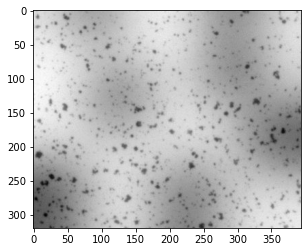

In [11]:
img = cv2.imread('particles.png', cv2.IMREAD_GRAYSCALE)                         
plt.imshow(img,'gray')
print('particles.png:',cv2.minMaxLoc(img))

A = Max_Filter(img,3): (18.0, 255.0, (18, 300), (2, 110))


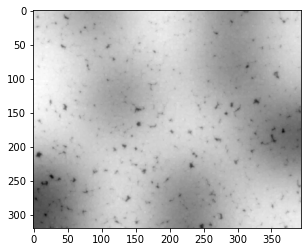

In [21]:
def Max_Filter(img,N):
    height = img.shape[0]
    length = img.shape[1]
    pad = N//2
    A = img.copy()
    for i in range(height):
        for j in range(length):
            #determine the length of each side of neighborhood
            up = i - pad
            down = i + pad
            left = j - pad
            right = j + pad
            #boundary treatment
            if up < 0:
                up = 0
            if down > height - 1:
                down = height - 1
            if left < 0:
                left = 0
            if right > length - 1:
                right = length - 1
            #determine the length of each side of neighborhood
            neighborhood = img[up:down+1, left:right+1]
            #find the max value
            A[i][j]=np.max(neighborhood)
    return A
                
                
#N =3, the input is particles.png    
A = Max_Filter(img,3)
plt.imshow(A,'gray')
print('A = Max_Filter(img,3):',cv2.minMaxLoc(A))

A = Min_Filter(img,3): (0.0, 248.0, (3, 276), (6, 113))


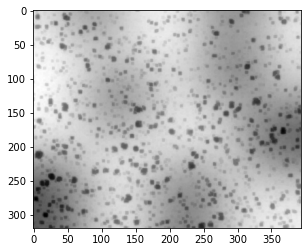

In [22]:
def Min_Filter(img,N):
    height = img.shape[0]
    length = img.shape[1]
    pad = N//2
    A = img.copy()
    for i in range(height):
        for j in range(length):
            #determine the length of each side of neighborhood
            up = i - pad
            down = i + pad
            left = j - pad
            right = j + pad
            #boundary treatment
            if up < 0:
                up = 0
            if down > height - 1:
                down = height - 1
            if left < 0:
                left = 0
            if right > length - 1:
                right = length - 1
            #determine the length of each side of neighborhood
            neighborhood = img[up:down+1, left:right+1]
            #find the max value
            A[i][j]=np.min(neighborhood)
    return A
                
                
#N =3, the input is particles.png        
A = Min_Filter(img,3)
plt.imshow(A,'gray')
print('A = Min_Filter(img,3):',cv2.minMaxLoc(A))

### Checking the correctness of MaxFilter and MinFilter

img: (0.0, 255.0, (4, 277), (3, 111))
ImageFilter.MaxFilter(size = 3): (18.0, 255.0, (18, 300), (2, 110))
ImageFilter.MinFilter(size = 3): (0.0, 248.0, (3, 276), (6, 113))


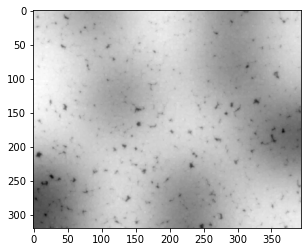

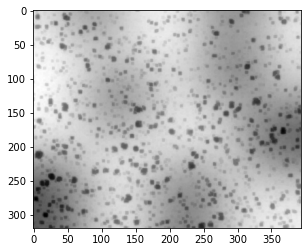

In [175]:
img = Image.open(r"particles.png") 
im2 = img.filter(ImageFilter.MaxFilter(size = 3)) 
im3 = img.filter(ImageFilter.MinFilter(size = 3)) 
plt.figure(1)
plt.imshow(im2,'gray')
plt.figure(2)
plt.imshow(im3,'gray')
img = np.uint8(img)
im2 = np.uint8(im2)
im3 = np.uint8(im3)
print('img:',cv2.minMaxLoc(img))
print('ImageFilter.MaxFilter(size = 3):',cv2.minMaxLoc(im2))
print('ImageFilter.MinFilter(size = 3):',cv2.minMaxLoc(im3))

## Task 1：
### 1. What is the smallest value of N that visually causes the dark particles in I to disappear altogether in image A?
### 2. Why this value of N, and not smaller values, causes the particles to disappear？


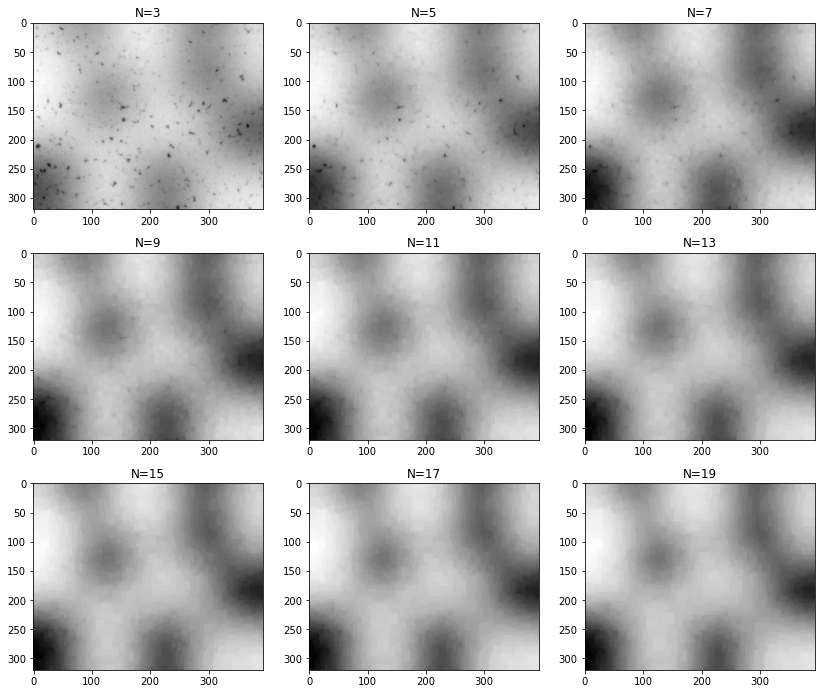

In [69]:
plt.figure(figsize=(14,12))
plt.subplot(331)
plt.title('N=3')
A3 = Max_Filter(img,3)
plt.imshow(A3,'gray')
#BN3 = Min_Filter(A3,3)

plt.subplot(332)
plt.title('N=5')
A5 = Max_Filter(img,5)
plt.imshow(A5,'gray')
#BN5 = Min_Filter(A5,5)

plt.subplot(333)
plt.title('N=7')
A7 = Max_Filter(img,7)
plt.imshow(A7,'gray')
#BN7 = Min_Filter(A7,7)

plt.subplot(334)
plt.title('N=9')
A9 = Max_Filter(img,9)
plt.imshow(A9,'gray')
#BN9 = Min_Filter(A9,9)

plt.subplot(335)
plt.title('N=11')
A11 = Max_Filter(img,11)
plt.imshow(A11,'gray')
#BN11 = Min_Filter(A11,11)

plt.subplot(336)
plt.title('N=13')
A13 = Max_Filter(img,13)
plt.imshow(A13,'gray')
#BN13 = Min_Filter(A13,13)

plt.subplot(337)
plt.title('N=15')
A15 = Max_Filter(img,15)
plt.imshow(A15,'gray')
#BN15 = Min_Filter(A15,15)

plt.subplot(338)
plt.title('N=17')
A17 = Max_Filter(img,17)
plt.imshow(A17,'gray')
#BN17 = Min_Filter(A15,17)

plt.subplot(339)
plt.title('N=19')
A19 = Max_Filter(img,19)
plt.imshow(A19,'gray')


### 3. What is the effect of taking larger values than this smallest value?
Checking the MSE and MinMax values when N is larger or equal than 15

In [127]:
def MSE(origin,new):
    diff = origin.astype('int')-new.astype('int')
    return np.square(diff).sum()/(origin.shape[0]*origin.shape[0])
print('N=11,',"compare MSE with N=9:",MSE(A11,A9),'MinMax:',cv2.minMaxLoc(A11))
print('N=13,',"compare MSE with N=11:",MSE(A11,A13),'MinMax:',cv2.minMaxLoc(A13))
print('N=15,',"compare MSE with N=13:",MSE(A15,A13),'MinMax:',cv2.minMaxLoc(A15))
print('N=17,',"compare MSE with N=15:",MSE(A15,A17),'MinMax:',cv2.minMaxLoc(A17))
print('N=19,',"compare MSE with N=17:",MSE(A17,A19),'MinMax:',cv2.minMaxLoc(A19))

N=11, compare MSE with N=9: 4.843974609375 MinMax: (94.0, 255.0, (0, 276), (0, 106))
N=13, compare MSE with N=11: 4.27783203125 MinMax: (94.0, 255.0, (0, 277), (0, 105))
N=15, compare MSE with N=13: 3.988515625 MinMax: (96.0, 255.0, (0, 305), (0, 104))
N=17, compare MSE with N=15: 3.7849609375 MinMax: (96.0, 255.0, (0, 306), (0, 103))
N=19, compare MSE with N=17: 3.6402734375 MinMax: (97.0, 255.0, (0, 298), (0, 102))


### 4.Background estimate image B 

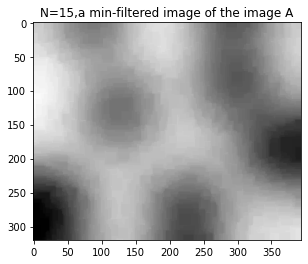

In [168]:
BN15 = Min_Filter(A15,15)
plt.title('N=15,a min-filtered image of the image A')
plt.imshow(BN15,'gray')

## Task 2
### Output image O included

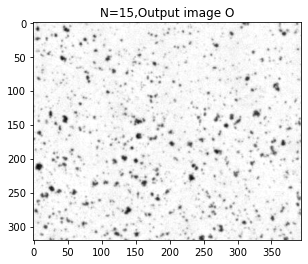

In [167]:
def Subtraction(I,B):
    O=I.copy()
    I = np.array(I, dtype =int )
    B = np.array(B, dtype =int )
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            #O = I - B + 255
            O[i][j]= I[i][j]-B[i][j]+255
            if O[i][j]>255:
                O[i][j]=255
    return O
O=Subtraction(img,BN15)
plt.title('N=15,Output image O')
plt.imshow(O,'gray')

## Task 3

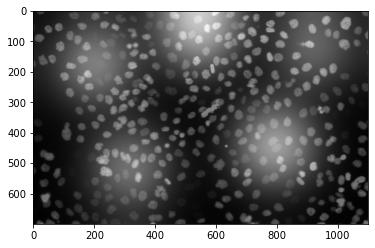

In [93]:
cells = cv2.imread('cells.png', cv2.IMREAD_GRAYSCALE)                         
plt.imshow(cells,'gray')

### Discussion of the best value for parameter N 

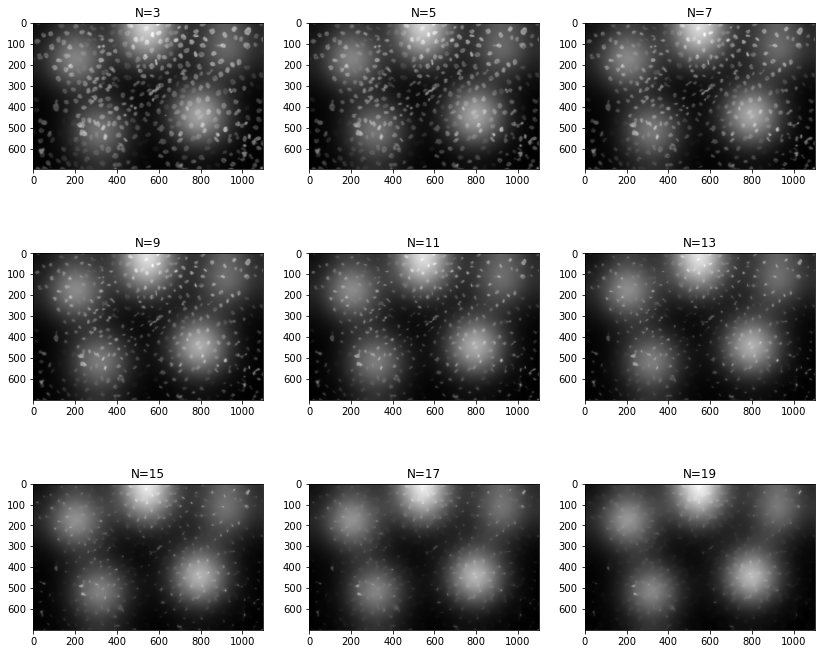

In [94]:
plt.figure(figsize=(14,12))
plt.subplot(331)
plt.title('N=3')
B3 = Min_Filter(cells,3)
plt.imshow(B3,'gray')

plt.subplot(332)
plt.title('N=5')
B5 = Min_Filter(cells,5)
plt.imshow(B5,'gray')

plt.subplot(333)
plt.title('N=7')
B7 = Min_Filter(cells,7)
plt.imshow(B7,'gray')

plt.subplot(334)
plt.title('N=9')
B9 = Min_Filter(cells,9)
plt.imshow(B9,'gray')

plt.subplot(335)
plt.title('N=11')
B11 = Min_Filter(cells,11)
plt.imshow(B11,'gray')

plt.subplot(336)
plt.title('N=13')
B13 = Min_Filter(cells,13)
plt.imshow(B13,'gray')

plt.subplot(337)
plt.title('N=15')
B15 = Min_Filter(cells,15)
plt.imshow(B15,'gray')

plt.subplot(338)
plt.title('N=17')
B17 = Min_Filter(cells,17)
plt.imshow(B17,'gray')

plt.subplot(339)
plt.title('N=19')
B19 = Min_Filter(cells,19)
plt.imshow(B19,'gray')


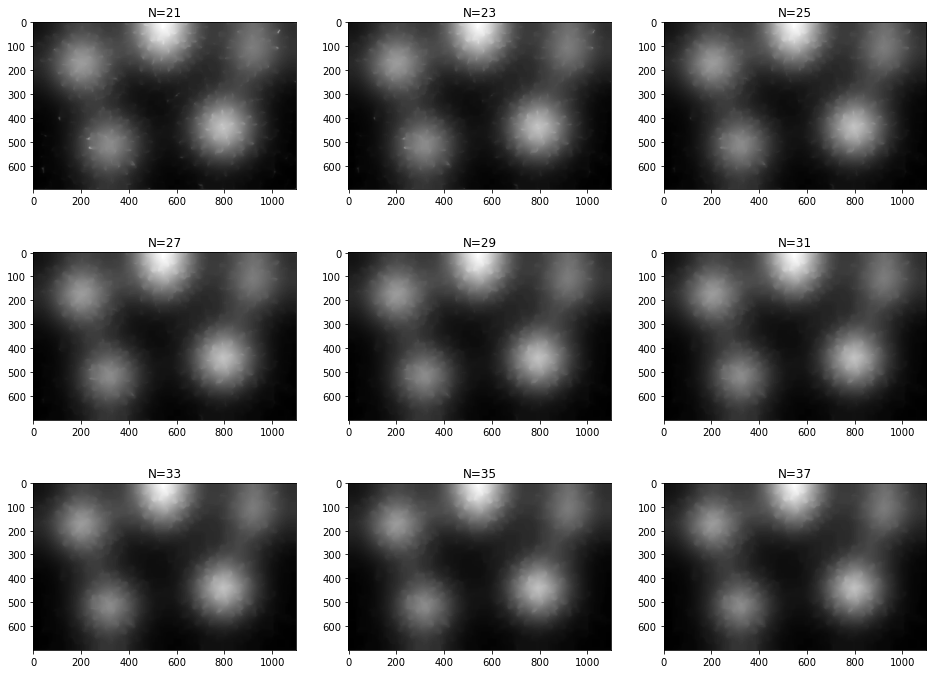

In [95]:
plt.figure(figsize=(16,12))
plt.subplot(331)
plt.title('N=21')
B21 = Min_Filter(cells,21)
plt.imshow(B21,'gray')

plt.subplot(332)
plt.title('N=23')
B23 = Min_Filter(cells,23)
plt.imshow(B23,'gray')

plt.subplot(333)
plt.title('N=25')
B25 = Min_Filter(cells,25)
plt.imshow(B25,'gray')

plt.subplot(334)
plt.title('N=27')
B27 = Min_Filter(cells,27)
plt.imshow(B27,'gray')

plt.subplot(335)
plt.title('N=29')
B29 = Min_Filter(cells,29)
plt.imshow(B29,'gray')

plt.subplot(336)
plt.title('N=31')
B31 = Min_Filter(cells,31)
plt.imshow(B31,'gray')

plt.subplot(337)
plt.title('N=33')
B33 = Min_Filter(cells,33)
plt.imshow(B33,'gray')

plt.subplot(338)
plt.title('N=35')
B35 = Min_Filter(cells,35)
plt.imshow(B35,'gray')

plt.subplot(339)
plt.title('N=37')
B37 = Min_Filter(cells,37)
plt.imshow(B37,'gray')


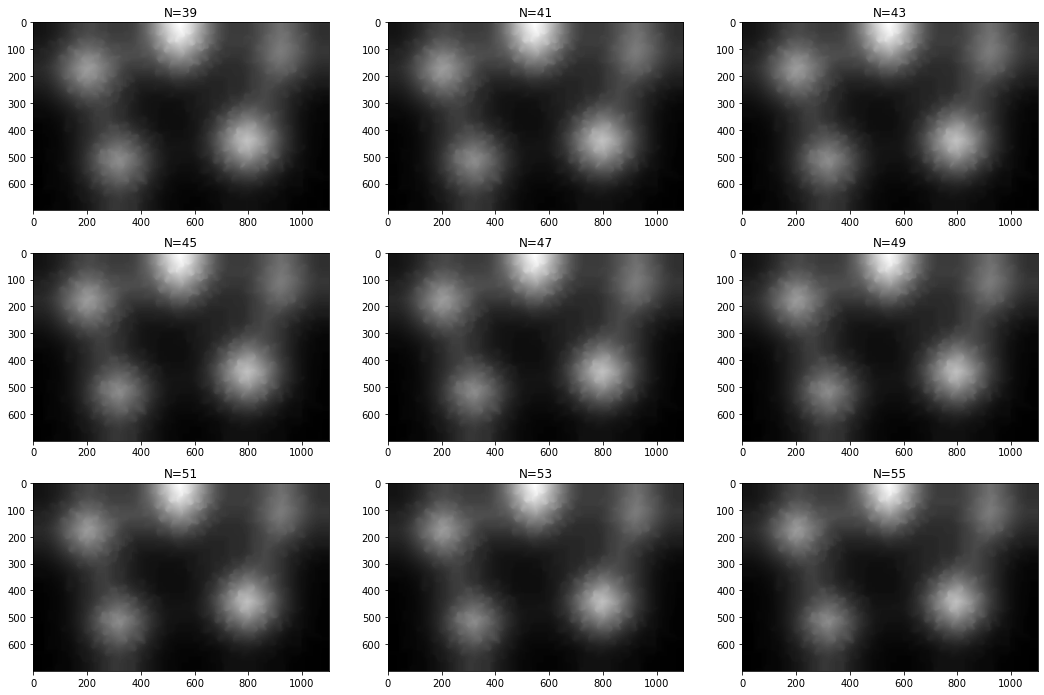

In [96]:
plt.figure(figsize=(18,12))
plt.subplot(331)
plt.title('N=39')
B39 = Min_Filter(cells,39)
plt.imshow(B39,'gray')

plt.subplot(332)
plt.title('N=41')
B41 = Min_Filter(cells,41)
plt.imshow(B41,'gray')

plt.subplot(333)
plt.title('N=43')
B43 = Min_Filter(cells,43)
plt.imshow(B43,'gray')

plt.subplot(334)
plt.title('N=45')
B45 = Min_Filter(cells,45)
plt.imshow(B45,'gray')

plt.subplot(335)
plt.title('N=47')
B47 = Min_Filter(cells,47)
plt.imshow(B47,'gray')

plt.subplot(336)
plt.title('N=49')
B49 = Min_Filter(cells,49)
plt.imshow(B49,'gray')

plt.subplot(337)
plt.title('N=51')
B51 = Min_Filter(cells,51)
plt.imshow(B51,'gray')

plt.subplot(338)
plt.title('N=53')
B53 = Min_Filter(cells,53)
plt.imshow(B53,'gray')

plt.subplot(339)
plt.title('N=55')
B55 = Min_Filter(cells,55)
plt.imshow(B55,'gray')


In [112]:
print('N=23,',"compare MSE with N=21:",MSE(B23,B21),'MinMax:',cv2.minMaxLoc(B23))
print('N=25,',"compare MSE with N=23:",MSE(B25,B23),'MinMax:',cv2.minMaxLoc(B25))
print('N=27,',"compare MSE with N=25:",MSE(B27,B25),'MinMax:',cv2.minMaxLoc(B27))
print('N=29,',"compare MSE with N=27:",MSE(B29,B27),'MinMax:',cv2.minMaxLoc(B29))
print('N=31,',"compare MSE with N=29:",MSE(B31,B29),'MinMax:',cv2.minMaxLoc(B31))
print('N=33,',"compare MSE with N=31:",MSE(B33,B31),'MinMax:',cv2.minMaxLoc(B33))
print('N=35,',"compare MSE with N=33:",MSE(B35,B33),'MinMax:',cv2.minMaxLoc(B35))
print('N=37,',"compare MSE with N=35:",MSE(B37,B35),'MinMax:',cv2.minMaxLoc(B37))
print('N=39,',"compare MSE with N=37:",MSE(B39,B37),'MinMax:',cv2.minMaxLoc(B39))
print('N=41,',"compare MSE with N=39:",MSE(B39,B41),'MinMax:',cv2.minMaxLoc(B41))

N=23, compare MSE with N=21: 2.458022448979592 MinMax: (0.0, 203.0, (0, 540), (544, 0))
N=25, compare MSE with N=23: 1.8839591836734695 MinMax: (0.0, 203.0, (0, 539), (545, 0))
N=27, compare MSE with N=25: 1.5585632653061225 MinMax: (0.0, 202.0, (0, 538), (543, 0))
N=29, compare MSE with N=27: 1.4046755102040815 MinMax: (0.0, 202.0, (0, 537), (544, 0))
N=31, compare MSE with N=29: 1.3198469387755103 MinMax: (0.0, 201.0, (0, 536), (543, 0))
N=33, compare MSE with N=31: 1.2647408163265306 MinMax: (0.0, 201.0, (0, 535), (544, 0))
N=35, compare MSE with N=33: 1.2271122448979592 MinMax: (0.0, 201.0, (0, 534), (545, 0))
N=37, compare MSE with N=35: 1.2032714285714285 MinMax: (0.0, 200.0, (0, 533), (545, 0))
N=39, compare MSE with N=37: 1.1866163265306122 MinMax: (0.0, 199.0, (0, 532), (542, 0))
N=41, compare MSE with N=39: 1.1726591836734694 MinMax: (0.0, 199.0, (0, 531), (544, 0))


[ 6.56250000e-03 -4.77009091e-01  9.79582841e+00]


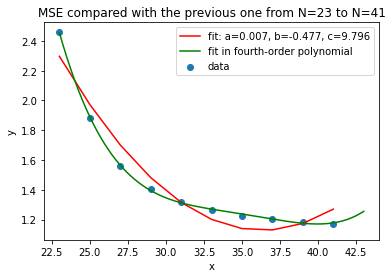

In [124]:
from scipy.optimize import curve_fit
xdata = np.arange(23,43,2)
ydata = np.array([2.458,1.884,1.559,1.405,1.320,1.265,1.227,1.203,1.187,1.173])
plt.scatter(xdata,ydata, marker='o',label='data')
def func(x, a, b, c):
    return a*x*x + b*x + c
 
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

c=np.polyfit(xdata,ydata,4)
yy = np.polyval(c,xdata)
x_new=np.linspace(23, 43, 2000)
f_liner=np.polyval(c,x_new)
plt.plot(x_new,f_liner,label=u'fit in fourth-order polynomial',color='g',linestyle='-',marker='')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("MSE compared with the previous one from N=23 to N=41")
plt.show()

### find the good value N from the final results

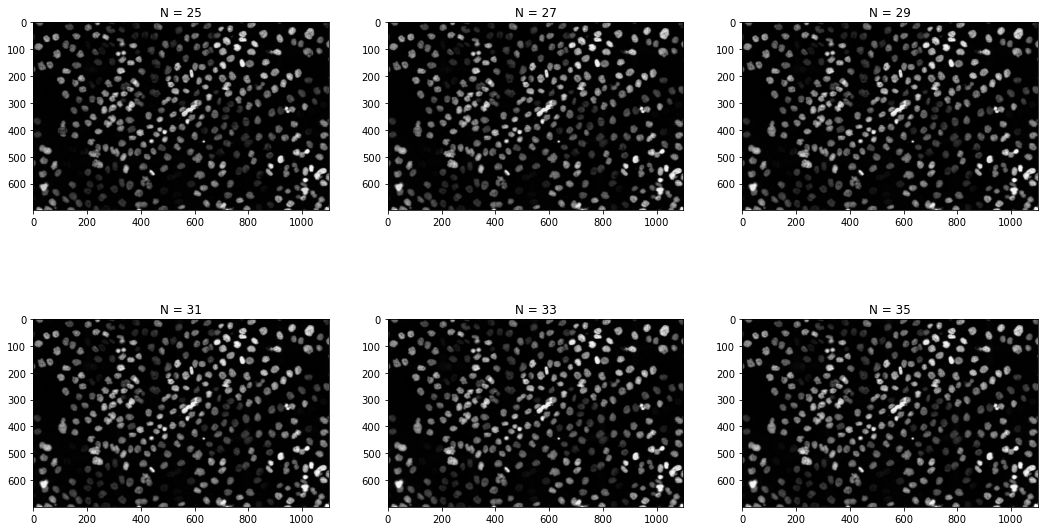

In [155]:
def Subtraction_cell(I,B):
    O=I.copy()
    I = np.array(I, dtype =int )
    B = np.array(B, dtype =int )
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            #O = I - B 
            O[i][j]= I[i][j]-B[i][j]
            if O[i][j]<0:
                O[i][j]=0
            if O[i][j]>255:
                O[i][j]=255
    return O
def M_1(cells, N):
    #first min_filtering
    B = Min_Filter(cells,N)
    #then max_filtering
    A = Max_Filter(B, N)
    #finally subtraction
    O = Subtraction_cell(cells, A)
    return O

plt.figure(figsize=(18,10))
for i in range(25, 37, 2):
    O = M_1(cells, i)
    #1,2,3,4,5,6,7,8
    plt.subplot(2,3,(int((i-25)/2)+1))
    s = 'N = '+str(i)
    plt.title(s)
    plt.imshow(O,'gray')
    

### main code

Enter your input M: 1
Enter your input N: 31


array([[  3,   2,   2, ...,  14,  11,   6],
       [  1,   1,   1, ...,  13,  10,   6],
       [  2,   2,   2, ...,  15,  11,   8],
       ...,
       [  1,   2,   2, ..., 111, 111, 111],
       [  2,   2,   2, ..., 111, 111, 111],
       [  2,   1,   1, ..., 111, 111, 111]], dtype=uint8)

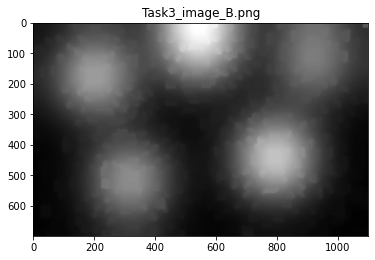

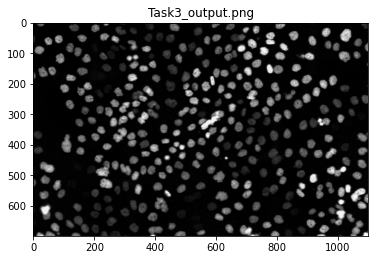

In [174]:
img1 = cv2.imread('particles.png', cv2.IMREAD_GRAYSCALE)   
img2 = cv2.imread('cells.png', cv2.IMREAD_GRAYSCALE) 
M = input("Enter your input M: ")
#for particles,N = 15
#for cells, N = 31
N = input("Enter your input N: ")
def Remove_the_Background(M,img1,img2,N):
    M = int(M)
    N = int(N)
    if M== 0:
        #works for particles
        #Max
        A = Max_Filter(img1,N)
        #Min
        B = Min_Filter(A,N)
        #Subtraction with correction
        O = Subtraction(img1,B)
        cv2.imwrite("Task1_image_B.png",B)
        cv2.imwrite("Task2_output.png",O)
        plt.figure(1)  
        plt.title("Task1_image_B.png")
        plt.imshow(B,'gray')
        plt.figure(2)
        plt.title("Task2_output.png")
        plt.imshow(O,'gray')
        return O
    if M==1:
        #works for cells
        #Min
        A = Min_Filter(img2,N)
        #Max
        B = Max_Filter(A,N)
        #Subtraction without correction
        O = Subtraction_cell(img2,B)
        cv2.imwrite("Task3_image_B.png",B)
        cv2.imwrite("Task3_output.png",O)
        plt.figure(1)   
        plt.title("Task3_image_B.png")
        plt.imshow(B,'gray')
        plt.figure(2)
        plt.title("Task3_output.png")
        plt.imshow(O,'gray')
        return O
Remove_the_Background(M,img1,img2,N)        